# AP21110011627
# Lab 8

In [30]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [31]:
def euclidian(x,y):
    return math.sqrt(np.sum((x-y)**2))

In [32]:
def predict(list1, list2, k):
    zipped_pairs = zip(list2, list1)
    # print(zipped_pairs)
    z = [x for _, x in sorted(zipped_pairs)]
    # print(z)
    dic = {}
    for i in range(k):
        if z[i] in dic.keys():
            dic[z[i]]+=1
        else:
            dic[z[i]]=1
    # print(dic)
    cl = max(zip(dic.values(), dic.keys()))[1]
    return cl

In [33]:
def knn(train,train_labels,test,k):
    output_labels = []
    for i in test:
        lis = []
        for j in train:
            lis.append(euclidian(i,j))
        # print(len(lis),type(lab))
        output_labels.append(predict(train_labels,lis,k))
    return output_labels

## mtcars dataset

## 1-a

In [34]:
mtdf = pd.read_csv("mtcars.csv")

In [35]:
print(np.mean(mtdf['mpg']))

20.090625000000003


**lets classify a car is fuel efficient (1) if its mpg is greater than 20; else not fuel efficient (2)**
- taking mean as a separator.

In [36]:
mtdf['fuel_efficient'] = [1 if i > 20 else 0 for i in mtdf['mpg']]

In [37]:
mtdf.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fuel_efficient
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


In [38]:
df = mtdf.drop(['model','mpg','fuel_efficient'],axis=1)
df_label = pd.DataFrame(mtdf['fuel_efficient'])

## 1-b

#### even numbered rows for train and odd numbered rows for test.

In [39]:
train = df.iloc[::2]
test = df.iloc[1::2]

In [40]:
test

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4
11,8,275.8,180,3.07,4.070,17.40,0,0,3,3
13,8,275.8,180,3.07,3.780,18.00,0,0,3,3
15,8,460.0,215,3.00,5.424,17.82,0,0,3,4
17,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [41]:
train_label = df_label.iloc[::2]
test_label = df_label.iloc[1::2]

In [42]:
train = train.to_numpy()
test = test.to_numpy()

In [43]:
train_label = train_label['fuel_efficient'].to_list()
test_label = test_label['fuel_efficient'].to_list()

In [44]:
out = knn(train,train_label,test,5) # k=5

In [45]:
out

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]

## 1-c

#### accuracy

In [46]:
cnt=0
for i in range(len(out)):
    if out[i] == test_label[i]:
        cnt+=1
acc = cnt/len(out)
print("acc: ",acc*100)

acc:  81.25


#### confusion matrix

In [47]:
cm = [[0,0],[0,0]]
for pred,actual in zip(out,test_label):
    cm[pred][actual]+=1
cm = np.array(cm)
print(cm)

[[6 1]
 [2 7]]


## 1-d

In [48]:
acc_list = []
c=0
for k in range(1,11):
    out = knn(train,train_label,test,k)
    cnt=0
    print(out)
    for i in range(len(out)):
        if out[i] == test_label[i]:
            cnt+=1
    acc = cnt/len(out)
    acc_list.append(acc)
print(acc_list)

[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[0.9375, 0.75, 0.75, 0.75, 0.8125, 0.75, 0.75, 0.8125, 0.8125, 0.8125]


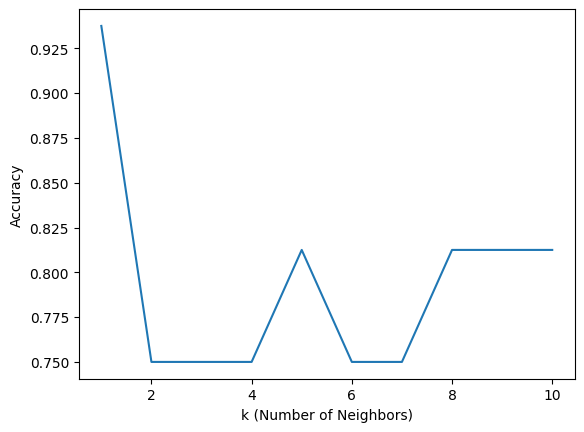

In [22]:
x=[x for x in range(1,11)]
# print(x)
plt.plot(x, acc_list)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()